In [4]:
import random
import matplotlib.pyplot as plt
import time

In [5]:
def distance(p, q):
    return ((p[0] - q[0])**2 + (p[1] - q[1])**2) ** 0.5

def brute_force(points):
    min_d = float('inf')
    pair = None
    n = len(points)
    for i in range(n):
        for j in range(i + 1, n):
            d = distance(points[i], points[j])
            if d < min_d:
                min_d = d
                pair = (points[i], points[j])
    return min_d, pair

In [6]:
def closest_pair_rec(Px, Py):
    n = len(Px)
    if n <= 3:
        return brute_force(Px)
    
    mid = n // 2
    mid_point = Px[mid]

    Qx, Rx = Px[:mid], Px[mid:]
    Qy, Ry = [], []
    for p in Py:
        (Qy if p[0] <= mid_point[0] else Ry).append(p)

    d_left, pair_left = closest_pair_rec(Qx, Qy)
    d_right, pair_right = closest_pair_rec(Rx, Ry)

    d_min, pair_min = (d_left, pair_left) if d_left < d_right else (d_right, pair_right)

    strip = [p for p in Py if abs(p[0] - mid_point[0]) < d_min]
    
    for i in range(len(strip)):
        for j in range(i + 1, len(strip)):
            if (strip[j][1] - strip[i][1]) >= d_min:
                break
            d = distance(strip[i], strip[j])
            if d < d_min:
                d_min, pair_min = d, (strip[i], strip[j])

    return d_min, pair_min


In [7]:
def closest_pair(points):
    Px = sorted(points, key=lambda p: p[0])
    Py = sorted(points, key=lambda p: p[1])
    return closest_pair_rec(Px, Py)

Puntos generados:
(18.098759250269648, 29.863839001680738)
(99.06046425738592, 87.01081629694637)
(13.577046801260828, 43.301123716135336)
(93.45484358041422, 12.90153720127688)
(79.41382783952403, 26.773758699983052)
(72.78249221765206, 49.32375730270625)
(68.17599060584774, 81.38582771615842)
(0.11905250314613314, 88.02554463490145)
(79.12223503523268, 93.91137666049447)
(38.12774683439508, 50.63795265755688)
(90.69816795757617, 32.15244816744469)
(12.686864662730823, 83.3956448653322)
(80.47833438628477, 9.156689709630506)
(43.059958637181026, 89.50909268863421)
(17.178097327719357, 59.42080942708491)
(71.94539418391916, 22.340176085280305)
(34.68856562258278, 30.29478168971036)
(66.38774317126453, 4.094283432121437)
(39.29361224985156, 69.25273127997072)
(94.88935982053506, 85.91961805031288)
(13.400264644314197, 76.97704394661523)
(26.17010544661221, 80.92548259838107)
(99.82460486632088, 11.053767490153742)
(12.427895942703781, 40.809025476560365)
(82.67144532305127, 90.320416348

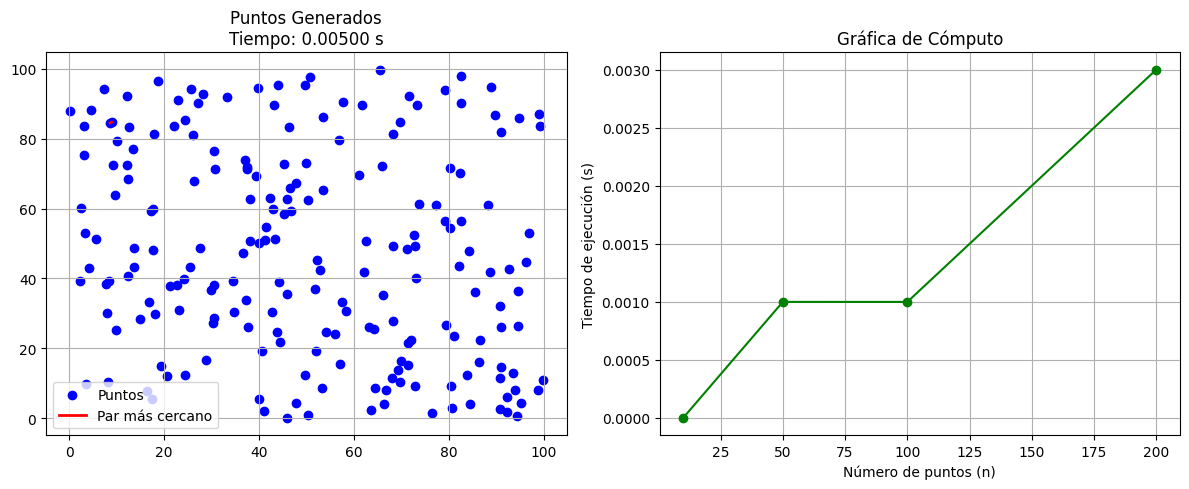

In [15]:
def main():
    n = int(input("Ingresa el número de puntos: "))
    start_time = time.time()  

    points = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(n)]

    print("Puntos generados:")
    for p in points:
        print(p)

    d, pair = closest_pair(points)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"\nLa menor distancia es: {d}\nEntre los puntos: {pair[0]} y {pair[1]}")
    print(f"\nTiempo de ejecución: {execution_time:.5f} segundos")

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    x_vals, y_vals = zip(*points)
    plt.scatter(x_vals, y_vals, color="blue", label="Puntos")
    plt.plot([pair[0][0], pair[1][0]], [pair[0][1], pair[1][1]], "r-", lw=2, label="Par más cercano")
    plt.legend()
    plt.grid()
    plt.title(f"Puntos Generados\nTiempo: {execution_time:.5f} s")

    # Gráfica de cómputo (Tiempo de ejecución vs. Número de puntos)
    n_values = [10, 50, 100, 200, 500, 1000, 2000]
    n_values = [val for val in n_values if val <= n]

    execution_times = []

    for n in n_values:
        points = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(n)]
        start_time = time.time()
        closest_pair(points)
        end_time = time.time()
        execution_times.append(end_time - start_time)

    plt.subplot(1, 2, 2)
    plt.plot(n_values, execution_times, marker='o', linestyle='-', color="green")
    plt.xlabel("Número de puntos (n)")
    plt.ylabel("Tiempo de ejecución (s)")
    plt.title("Gráfica de Cómputo")
    plt.grid()

    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    main()